In [167]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit
# import gloabl variables
from warpped.global_variables import * 

In [58]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=12; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k12_rep_2.mat'

In [59]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [60]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


# HMM Description

## Gamma

In [61]:
gamma = np.array(hmm['Gamma'])

In [62]:
gamma_sub_list = []
for i in range(1, sub_num+1):
    gamma_sub = gamma[450*(i-1):450*i,:]
    gamma_sub_list.append(gamma_sub)
print(len(gamma_sub_list))

111


In [63]:
def list_average(data_list):
    total = 0
    for data in data_list:
        total += data
    return total/len(data_list)

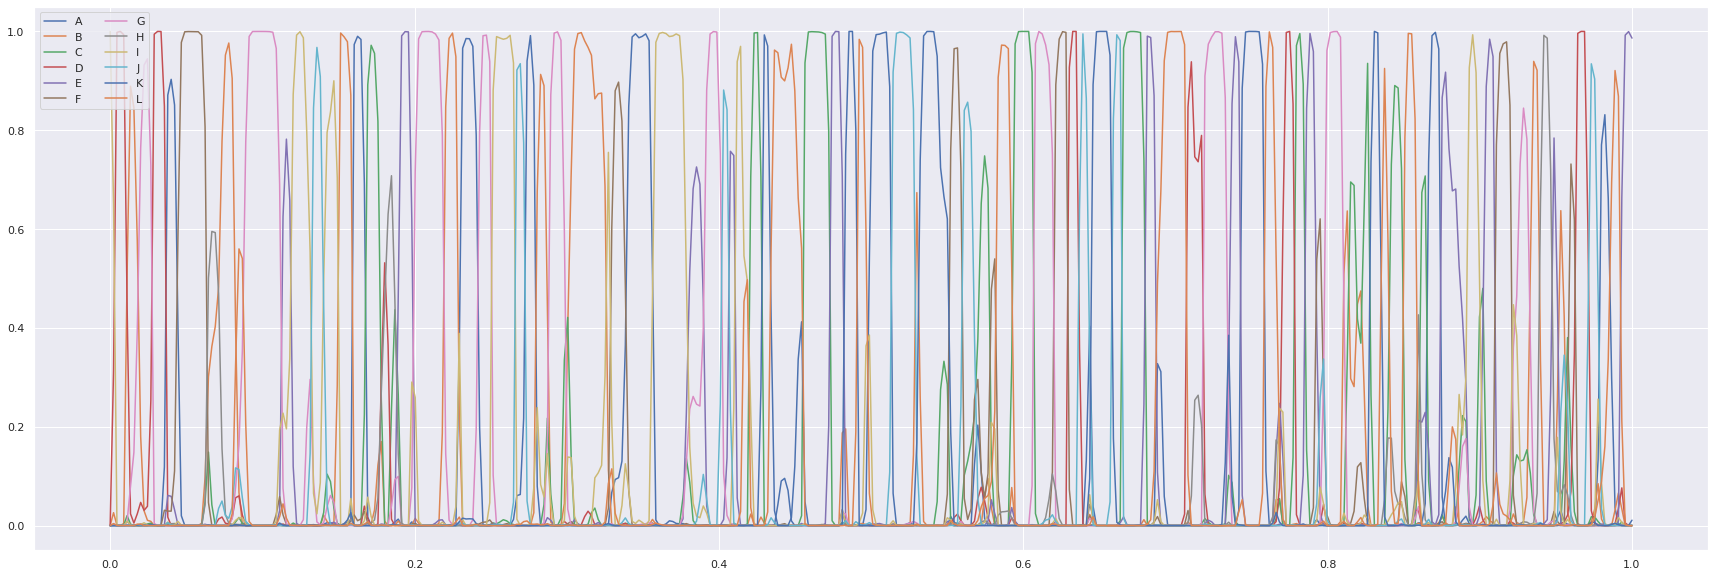

In [64]:
legands = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i in range(1):
    gamma_sub_list[0].shape
    x = np.linspace(0, 1, 450)
    sns.set()
    plt.figure(figsize=(30,10))
    plt.plot(x, gamma_sub_list[i])
    plt.legend(legands[:K_state], ncol=round(K_state/5), loc='upper left');

## Transition Matrix

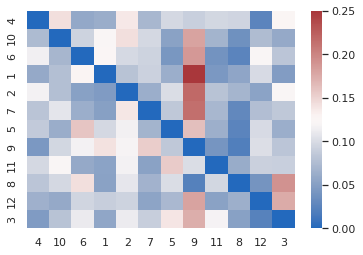

In [65]:
for cmap in ['vlag']:
    sns.heatmap(ordered_p,cmap=cmap,vmax=0.25 )
    plt.show()

##  FO Correlation Matrix

<AxesSubplot:>

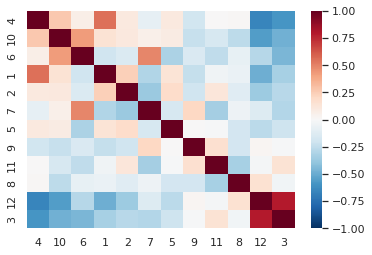

In [66]:
sns.heatmap(fo_corr,vmin=-1,cmap='RdBu_r')

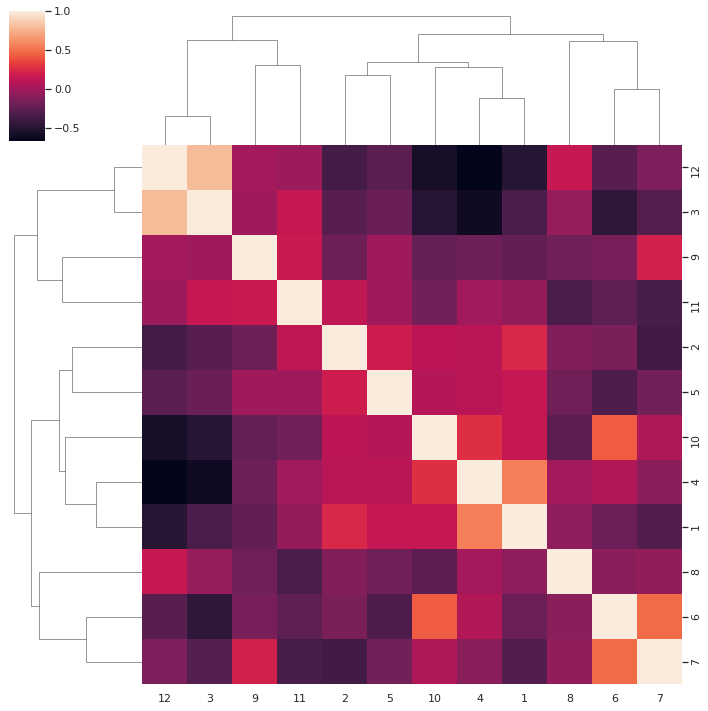

In [67]:
sns.clustermap(fo_corr)

# Meta states

In [68]:
from IPython.display import SVG
import numpy as np
import networkx as nx
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, modularity, bimodularity
from sknetwork.linalg import normalize
from sknetwork.utils import bipartite2undirected, membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [69]:
G = nx.DiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
for node in ordered_p.columns:
    for other_node in ordered_p.index:
        if node == other_node:
            continue
        G.add_weighted_edges_from([(node, other_node, ordered_p.loc[node,other_node])])

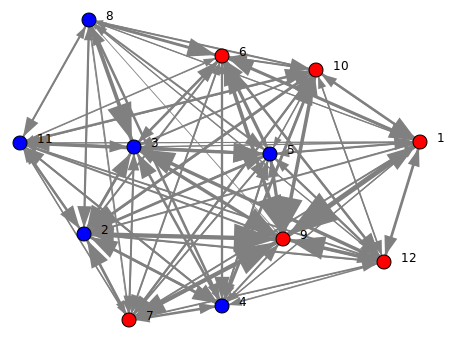

In [70]:
A= nx.to_scipy_sparse_matrix(G)
louvain = Louvain()
labels = louvain.fit_transform(A)
names = ordered_p.columns
image = svg_digraph(A,names=names, labels=labels)
SVG(image)

## Logistic Regression 

In [84]:
fo['chronotype']=chrono_array
fo['time'] = ses_array

In [85]:
fo.to_csv(f'fo_target_K{K_state}.csv')

from IPython.display import HTML
file = f'drive/MyDrive/HMM/jasp/jasp_k{K_state}_r{rep_num}.html'
HTML(filename=file)